# Ejercicios de clase

### <font color ='red'> **Ejercicio 1** 
 1. Generación variable aleatoria continua
El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $f(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

In [22]:
import matplotlib.pyplot as plt
import numpy as np
f = lambda x: 1/((np.sqrt(1-x))*(np.sqrt(x))*np.pi)
Finv = lambda u : np.sin((np.pi*u)/2)**2


In [67]:
def comparar_aleatorios_densidad(f, Finv, N):
    U = np.random.uniform(0, 1, N)
    f_rand = Finv(U)
    x = np.arange(.03, .97, .01)
    f_densidad = f(x)
    plt.hist(f_rand, bins = 40,density=True)
    plt.plot(x, f_densidad)
    plt.show()
    

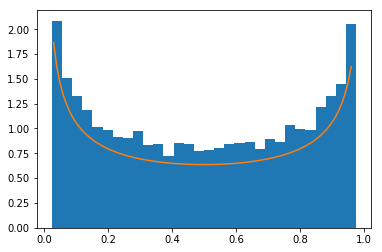

In [57]:
N = 10000
comparar_aleatorios_densidad(f, Finv, N)

# Ejercicio 2 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
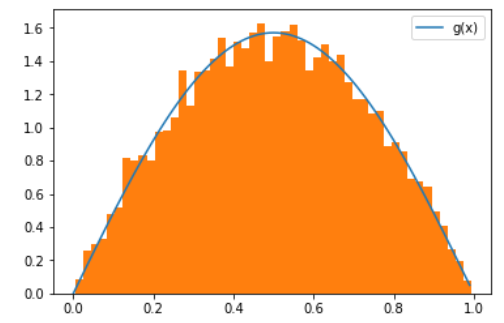

In [71]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <= f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]                
    plt.show()


El máximo de f es: [1.875]


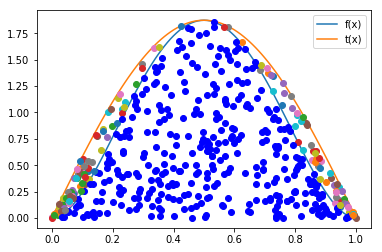

In [72]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.sin(np.pi*x) 

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios 
# basados en el dominio de la función f(x), en este caso el dominio es [0,1],
# entonces yo debo de generar variables aleatorias uniformes entre U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)
# plt.show()
aleatorias = Acep_rechazo(R2,R1,f,t)

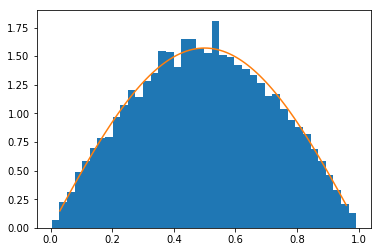

In [73]:
g = lambda x: (np.pi/2)*np.sin(np.pi*x)
G_inv = lambda u: (1/np.pi)*np.arccos(-2*u+1)

N = 10000
comparar_aleatorios_densidad(g, G_inv, N)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
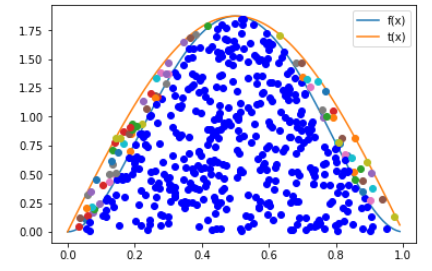

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo